In [3]:
from pycoingecko import CoinGeckoAPI
import pandas_datareader as web
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.stats import norm
import numpy as np
import pandas as pd
from polygon import WebSocketClient, CRYPTO_CLUSTER
from polygon import RESTClient
from datetime import datetime
import quandl


In [8]:
sol_df = pd.read_csv('./data/coincodex/solana_2020-12-1_2022-1-17.csv')
sol_df.set_index('Date',inplace=True)
sol_df.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
Dec-05-2020,1.851515,1.977514,1.827409,1.977440,3.075995e+07,8.849150e+07
Dec-04-2020,2.098405,2.110675,1.841711,1.856668,3.959888e+07,9.232912e+07
Dec-03-2020,2.114955,2.215764,2.080785,2.098405,5.240107e+07,9.900875e+07
Dec-02-2020,1.971593,2.172160,1.958971,2.112355,4.113504e+07,9.605753e+07
Dec-01-2020,1.962367,2.124009,1.932501,1.977516,3.660476e+07,9.317730e+07


In [9]:
sol_df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
Jan-16-2022,147.729708,151.769500,146.287583,147.892321,1.469219e+09,4.664891e+10
Jan-15-2022,146.214817,149.359400,144.492538,147.772275,1.848767e+09,4.604323e+10
Jan-14-2022,145.835000,150.435737,142.296100,146.287610,2.880095e+09,4.601520e+10
Jan-13-2022,151.525600,157.315077,145.866507,146.143700,2.907038e+09,4.703158e+10
Jan-12-2022,140.227900,152.942365,138.487796,151.644100,2.327960e+09,4.515453e+10


In [10]:
avax_df = pd.read_csv('./data/coincodex/avalanche_2020-12-1_2022-1-17.csv')
avax_df.set_index('Date',inplace=True)
avax_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
Jan-16-2022,93.200414,94.874300,91.938561,92.278454,7.171464e+08,2.275113e+10
Jan-15-2022,90.370172,94.210130,89.827622,93.324915,7.467550e+08,2.237054e+10
Jan-14-2022,89.491900,91.560474,87.444841,90.260713,1.024667e+09,2.196741e+10
Jan-13-2022,95.980700,96.996574,89.663700,89.676900,1.163556e+09,2.287382e+10
Jan-12-2022,89.535700,96.522283,88.942000,95.857500,1.156957e+09,2.271101e+10
...,...,...,...,...,...,...
Dec-05-2020,3.534045,3.718005,3.513630,3.630332,2.445545e+07,8.940219e+07
Dec-04-2020,3.820087,3.865357,3.516727,3.556966,2.436822e+07,9.053740e+07
Dec-03-2020,3.738596,3.889555,3.723324,3.819472,2.743838e+07,9.302110e+07


In [11]:
ada_df = pd.read_csv('./data/coincodex/cardano_2018-12-1_2022-1-17.csv')
ada_df.set_index('Date',inplace=True)
ada_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
Jan-16-2022,1.293358,1.420750,1.290364,1.407361,2.113853e+09,4.336816e+10
Jan-15-2022,1.291961,1.316111,1.255662,1.295255,1.483255e+09,4.021249e+10
Jan-14-2022,1.230540,1.306331,1.223607,1.288240,2.107726e+09,3.968948e+10
Jan-13-2022,1.305550,1.350301,1.235559,1.236217,2.265930e+09,4.037356e+10
Jan-12-2022,1.186455,1.306466,1.186455,1.303143,1.518278e+09,3.921443e+10
...,...,...,...,...,...,...
Dec-05-2018,0.037692,0.037693,0.034540,0.034540,2.296999e+07,9.412762e+08
Dec-04-2018,0.038764,0.039872,0.037394,0.037654,2.178086e+07,1.003007e+09
Dec-03-2018,0.041688,0.041911,0.038229,0.038764,1.996310e+07,1.036551e+09


In [12]:
atom_df = pd.read_csv('./data/coincodex/cosmos_2018-12-1_2022-1-7.csv')
atom_df.set_index('Date',inplace=True)
atom_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
Jan-07-2022,40.185334,44.472000,38.148084,38.456700,4.621809e+09,9.350589e+09
Jan-06-2022,38.629500,41.215300,35.678200,39.843606,3.595734e+09,8.571139e+09
Jan-05-2022,42.090941,43.033168,34.784300,39.004500,3.193832e+09,9.093642e+09
Jan-04-2022,39.262000,43.724996,37.572773,41.943749,3.224922e+09,9.156021e+09
Jan-03-2022,35.596000,39.570858,34.319716,39.406600,1.733616e+09,8.337951e+09
...,...,...,...,...,...,...
Mar-18-2019,3.983772,4.519993,3.879725,4.247915,8.800543e+05,0.000000e+00
Mar-17-2019,5.510958,5.510958,3.836528,3.879725,8.382696e+05,0.000000e+00
Mar-16-2019,6.175059,6.176682,4.967798,5.450117,1.165466e+06,0.000000e+00


In [13]:
eos_df = pd.read_csv('./data/coincodex/eos_2017-12-1_2022-1-17.csv')
eos_df.set_index('Date',inplace=True)
eos_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
Jan-16-2022,2.912428,2.945280,2.872401,2.907117,3.312796e+08,2.847453e+09
Jan-15-2022,2.864452,2.944180,2.855063,2.914555,4.034883e+08,2.831234e+09
Jan-14-2022,2.788051,2.920843,2.783245,2.867496,4.509996e+08,2.789240e+09
Jan-13-2022,2.884481,2.902380,2.788088,2.794862,3.927059e+08,2.792605e+09
Jan-12-2022,2.769200,2.906876,2.767242,2.881841,4.182181e+08,2.766340e+09
...,...,...,...,...,...,...
Dec-05-2017,4.056956,4.490713,3.708268,4.204456,1.123480e+08,0.000000e+00
Dec-04-2017,3.609076,4.192099,3.575853,4.016964,1.085016e+08,0.000000e+00
Dec-03-2017,3.920830,4.118185,3.451298,3.601651,1.005858e+08,0.000000e+00


In [14]:
eth_df = pd.read_csv('./data/coincodex/ethereum_2018-12-1_2022-1-17.csv')
eth_df.set_index('Date',inplace=True)
eth_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
Jan-16-2022,3331.375193,3378.954300,3292.909500,3354.693115,1.227458e+10,3.975004e+11
Jan-15-2022,3312.161663,3367.666120,3280.944130,3331.834267,1.521468e+10,3.966457e+11
Jan-14-2022,3245.768700,3334.329197,3202.761300,3314.714162,1.903904e+10,3.903704e+11
Jan-13-2022,3373.881300,3409.041571,3248.202399,3256.141500,2.203296e+10,3.965815e+11
Jan-12-2022,3239.918200,3409.925100,3215.343755,3374.303800,2.211066e+10,3.934373e+11
...,...,...,...,...,...,...
Dec-05-2018,110.390897,110.822358,102.973950,102.973950,1.285416e+09,1.111146e+10
Dec-04-2018,109.214833,113.360783,107.863782,110.324945,1.267955e+09,1.148957e+10
Dec-03-2018,116.873615,116.996181,108.123303,109.190723,1.208558e+09,1.163464e+10


In [15]:
ftm_df = pd.read_csv('./data/coincodex/fantom_2018-12-1_2022-1-17.csv')
ftm_df.set_index('Date',inplace=True)
ftm_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
Jan-16-2022,3.008182,3.316704,2.946355,3.306219,2.852503e+09,8.085296e+09
Jan-15-2022,2.963394,3.024391,2.843220,3.012270,2.681414e+09,7.398719e+09
Jan-14-2022,2.996067,3.053992,2.816005,2.957646,4.883717e+09,7.524089e+09
Jan-13-2022,2.939825,3.138178,2.803410,3.004518,4.870869e+09,7.578404e+09
Jan-12-2022,2.588340,3.005004,2.588340,2.932180,3.900513e+09,7.191380e+09
...,...,...,...,...,...,...
Dec-05-2018,0.006018,0.006041,0.005223,0.005252,9.670285e+05,7.038612e+06
Dec-04-2018,0.005914,0.006257,0.005771,0.006005,1.504872e+06,7.639112e+06
Dec-03-2018,0.006539,0.006552,0.005901,0.005906,1.305970e+06,7.929992e+06


In [16]:
luna_terra_df = pd.read_csv('./data/coincodex/luna_2020-12-1_2022-1-17.csv')
luna_terra_df.set_index('Date',inplace=True)
luna_terra_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
Jan-16-2022,87.452150,87.579707,84.830513,87.061253,7.108747e+08,3.088621e+10
Jan-15-2022,81.532031,87.944045,79.724377,87.606706,6.603017e+08,2.994586e+10
Jan-14-2022,78.185900,82.904873,75.924637,81.729617,9.857812e+08,2.861373e+10
Jan-13-2022,82.016300,83.823768,77.558741,78.292500,1.087269e+09,2.895020e+10
Jan-12-2022,72.733900,82.941200,71.822500,82.391900,9.076688e+08,2.743757e+10
...,...,...,...,...,...,...
Dec-05-2020,0.451275,0.507713,0.447554,0.507713,4.309684e+06,1.849394e+08
Dec-04-2020,0.501514,0.506210,0.451157,0.452620,8.032839e+06,1.835933e+08
Dec-03-2020,0.407661,0.500521,0.407661,0.500521,4.356896e+06,1.725738e+08


In [17]:
matic_df = pd.read_csv('./data/coincodex/matic-network_2019-12-1_2022-1-17.csv')
matic_df.set_index('Date',inplace=True)
matic_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
Jan-16-2022,2.349063,2.368730,2.288970,2.330809,1.034239e+09,1.153844e+10
Jan-15-2022,2.336555,2.396137,2.307122,2.353586,1.414061e+09,1.166601e+10
Jan-14-2022,2.260520,2.347063,2.189995,2.339803,1.753179e+09,1.128620e+10
Jan-13-2022,2.395786,2.430676,2.244977,2.267512,2.090970e+09,1.164781e+10
Jan-12-2022,2.358916,2.441087,2.311362,2.387033,2.538726e+09,1.165257e+10
...,...,...,...,...,...,...
Dec-05-2019,0.031733,0.034191,0.031566,0.033168,6.600691e+07,8.423388e+07
Dec-04-2019,0.029420,0.032335,0.028096,0.031752,5.329518e+07,7.705908e+07
Dec-03-2019,0.026293,0.030885,0.026293,0.029415,5.407290e+07,7.445646e+07


In [18]:
dot_df = pd.read_csv('./data/coincodex/polkadot_2020-12-1_2022-1-17.csv')
dot_df.set_index('Date',inplace=True)
dot_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
Jan-16-2022,27.639621,28.398000,27.347800,27.704811,1.292161e+09,2.505975e+10
Jan-15-2022,27.711993,28.349209,26.914688,27.741633,1.270666e+09,2.472050e+10
Jan-14-2022,25.770900,27.796135,25.668700,27.730569,1.576861e+09,2.420663e+10
Jan-13-2022,27.312400,27.556791,25.854624,25.869300,1.372426e+09,2.396048e+10
Jan-12-2022,25.539300,27.544200,25.486400,27.297600,1.539876e+09,2.377584e+10
...,...,...,...,...,...,...
Dec-05-2020,5.019685,5.186312,4.898190,5.186312,2.910183e+08,4.561758e+09
Dec-04-2020,5.410043,5.431980,4.985005,5.047263,2.819959e+08,4.695801e+09
Dec-03-2020,5.470747,5.539942,5.341099,5.413367,3.477029e+08,4.889954e+09


In [19]:
flow_df = pd.read_csv('./data/coincodex/flow_2021-12-1_2022-1-17.csv')
flow_df.set_index('Date',inplace=True)
flow_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
Jan-16-2022,7.732209,7.796572,7.478045,7.615822,3.184978e+07,2.446932e+09
Jan-15-2022,7.740163,7.773536,7.636659,7.732209,4.062837e+07,2.455309e+09
Jan-14-2022,7.724135,7.855333,7.600376,7.728967,4.078069e+07,2.465058e+09
Jan-13-2022,7.936962,8.104002,7.756129,7.756129,4.252617e+07,2.514096e+09
Jan-12-2022,7.630069,7.957653,7.607161,7.936962,4.612501e+07,2.465486e+09
Jan-11-2022,7.482816,7.652786,7.314113,7.630069,4.794927e+07,2.369094e+09
Jan-10-2022,7.812585,7.924213,7.226071,7.482816,3.938703e+07,2.421786e+09
Jan-09-2022,7.700670,7.910641,7.684371,7.812585,4.132607e+07,2.468833e+09
Jan-08-2022,7.956822,8.048795,7.574004,7.719028,4.292172e+07,2.500417e+09


In [38]:
coins=['avax','ada','atom','eos','flow','eth','matic','ftm','luna','dot']
close_df = pd.DataFrame(columns=coins)
close_df['eth'] = eth_df.iloc[::-1]['Close']
close_df['avax'] = avax_df.iloc[::-1]['Close']
close_df['ada'] = ada_df.iloc[::-1]['Close']
close_df['atom'] = atom_df.iloc[::-1]['Close']
close_df['eos'] = eos_df.iloc[::-1]['Close']
close_df['ftm'] = ftm_df.iloc[::-1]['Close']
close_df['flow'] = flow_df.iloc[::-1]['Close']
close_df['luna'] = luna_terra_df.iloc[::-1]['Close']
close_df['matic'] = matic_df.iloc[::-1]['Close']
close_df['dot'] = dot_df.iloc[::-1]['Close']
close_df['sol'] = sol_df.iloc[::-1]['Close']

non_eth_coins=['avax','ada','atom','eos','flow', 'matic','ftm','luna','dot']
non_eth_close_df = pd.DataFrame(columns=non_eth_coins)
non_eth_close_df['avax'] = avax_df.iloc[::-1]['Close']
non_eth_close_df['ada'] = ada_df.iloc[::-1]['Close']
non_eth_close_df['atom'] = atom_df.iloc[::-1]['Close']
non_eth_close_df['eos'] = eos_df.iloc[::-1]['Close']
non_eth_close_df['ftm'] = ftm_df.iloc[::-1]['Close']
non_eth_close_df['flow'] = flow_df.iloc[::-1]['Close']
non_eth_close_df['luna'] = luna_terra_df.iloc[::-1]['Close']
non_eth_close_df['matic'] = matic_df.iloc[::-1]['Close']
non_eth_close_df['dot'] = dot_df.iloc[::-1]['Close']
non_eth_close_df['sol'] = sol_df.iloc[::-1]['Close']


close_df

,avax,ada,atom,eos,flow,eth,matic,ftm,luna,dot,sol
Date,,,,,,,,,,,
Dec-01-2018,NaN,0.041477,NaN,2.952510,NaN,118.690058,NaN,0.006933,NaN,NaN,NaN
Dec-02-2018,NaN,0.041639,NaN,2.847102,NaN,116.716256,NaN,0.006531,NaN,NaN,NaN
Dec-03-2018,NaN,0.038764,NaN,2.608398,NaN,109.190723,NaN,0.005906,NaN,NaN,NaN
Dec-04-2018,NaN,0.037654,NaN,2.458602,NaN,110.324945,NaN,0.006005,NaN,NaN,NaN
Dec-05-2018,NaN,0.034540,NaN,2.206778,NaN,102.973950,NaN,0.005252,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Jan-12-2022,95.857500,1.303143,NaN,2.881841,7.936962,3374.303800,2.387033,2.932180,82.391900,27.297600,151.644100
Jan-13-2022,89.676900,1.236217,NaN,2.794862,7.756129,3256.141500,2.267512,3.004518,78.292500,25.869300,146.143700
Jan-14-2022,90.260713,1.288240,NaN,2.867496,7.728967,3314.714162,2.339803,2.957646,81.729617,27.730569,146.287610


In [39]:
close_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, Dec-01-2018 to Jan-16-2022
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   avax    412 non-null    float64
 1   ada     1143 non-null   float64
 2   atom    1031 non-null   float64
 3   eos     1143 non-null   float64
 4   flow    47 non-null     float64
 5   eth     1143 non-null   float64
 6   matic   778 non-null    float64
 7   ftm     1143 non-null   float64
 8   luna    412 non-null    float64
 9   dot     412 non-null    float64
 10  sol     412 non-null    float64
dtypes: float64(11)
memory usage: 107.2+ KB


Text(0.5, 1.0, 'Price Over Time')

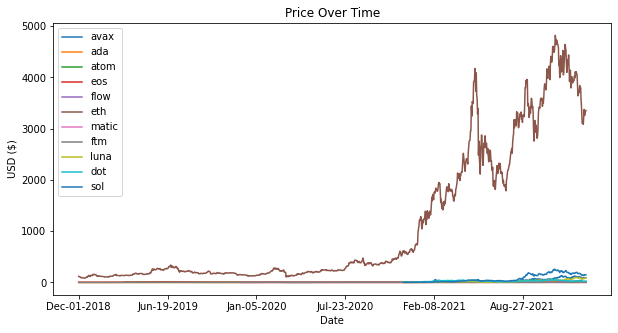

In [40]:
ax = close_df.plot(figsize=(10,5))
#ax.set_xlim(pd.Timestamp('2020-09-15'),pd.Timestamp('2022-01-20'))
ax.set_ylabel("USD ($)")
ax.set_xlabel("Date")
ax.set_title('Price Over Time')

Text(0.5, 1.0, 'Non ETH - Price Over Time')

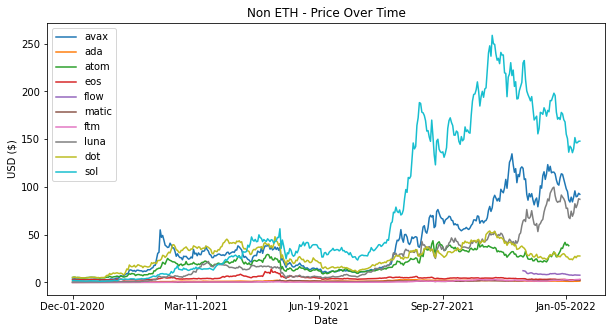

In [43]:
ax = non_eth_close_df.plot(figsize=(10,5))
#ax.set_xlim(pd.Timestamp('2020-12-15'),pd.Timestamp('2022-01-20'))
ax.set_ylabel("USD ($)")
ax.set_xlabel("Date")
ax.set_title('Non ETH - Price Over Time')

In [44]:
def calculate_return(data):
    log_return = np.log(data/data.shift(1))
    return  log_return[1:]

In [56]:
non_eth_coins=['avax','ada','atom','eos','flow', 'matic','ftm','luna','dot']
non_eth_vol_df = pd.DataFrame(columns=non_eth_coins)

coins=['avax','ada','atom','eos','flow','eth','matic','ftm','luna','dot']
vol_df = pd.DataFrame(columns=coins)

non_eth_vol_df = calculate_return(non_eth_close_df)
vol_df = calculate_return(close_df)



GLOBAL_TRADING_DAYS = len(non_eth_close_df)
GLOBAL_TRADING_DAYS

412

Text(0.5, 1.0, 'Log Normailzed Return Over Time Non ETH')

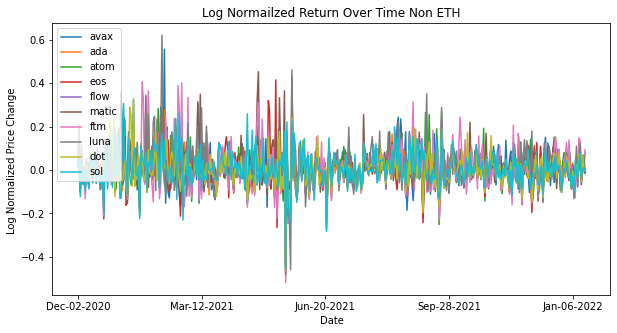

In [54]:
ax = non_eth_vol_df.plot(figsize=(10,5))
#ax.set_xlim(pd.Timestamp('2021-01-15'),pd.Timestamp('2022-01-20'))
ax.set_ylabel("Log Normalized Price Change ")
ax.set_xlabel("Date")
ax.set_title('Log Normailzed Return Over Time Non ETH')

Text(0.5, 1.0, 'Log Normailzed Return Over Time With ETH')

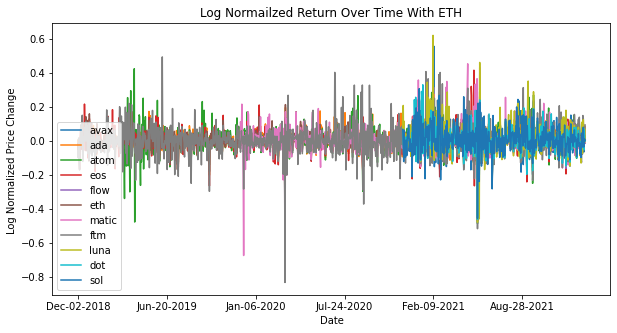

In [57]:
ax = vol_df.plot(figsize=(10,5))
#ax.set_xlim(pd.Timestamp('2021-01-15'),pd.Timestamp('2022-01-20'))
ax.set_ylabel("Log Normalized Price Change ")
ax.set_xlabel("Date")
ax.set_title('Log Normailzed Return Over Time With ETH')

In [55]:
def get_stats(data):
    # Annualize Metric
  
    print(f'Calculating for {GLOBAL_TRADING_DAYS} trading days assuming 365/24/7 markets')
    # Mean
    print(data.mean() * GLOBAL_TRADING_DAYS)
    # Covariance
    print(data.cov() * GLOBAL_TRADING_DAYS)
    
get_stats(non_eth_vol_df)

Calculating for 412 trading days assuming 365/24/7 markets
avax     3.258399
ada      2.204097
atom     2.035026
eos     -0.033473
flow    -4.288912
matic    4.835852
ftm      5.093590
luna     5.423030
dot      1.697530
sol      4.325141
dtype: float64
           avax       ada      atom       eos      flow     matic       ftm  \
avax   3.240277  1.425815  1.639435  1.451696  0.771995  1.717697  1.634203   
ada    1.425815  1.731220  1.274205  1.282537  0.703619  1.415962  1.303583   
atom   1.639435  1.274205  2.666551  1.523043  0.887389  1.617693  1.827145   
eos    1.451696  1.282537  1.523043  2.264847  0.788695  1.643323  1.662203   
flow   0.771995  0.703619  0.887389  0.788695  0.725654  0.790963  0.886002   
matic  1.717697  1.415962  1.617693  1.643323  0.790963  3.577731  2.120103   
ftm    1.634203  1.303583  1.827145  1.662203  0.886002  2.120103  4.631679   
luna   1.659651  1.087713  1.536232  1.283038  0.389157  1.538870  1.814928   
dot    1.512571  1.294161  1.718353

In [68]:
NUM_PORFOLIOS = 100000

portfolio_weights = [0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09]
portfolio_non_eth_weights = [0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10]
def show_mean_variance(returns, weights):
    
    # Annualized
    portfolio_return = np.sum(returns.mean()* weights * GLOBAL_TRADING_DAYS)
    portfolio_volatility = np.dot(weights.T) * np.dot(returns.cov() * GLOBAL_TRADING_DAYS, weights)
    
    print(f"Expected protfolio mean (return): {portfolio_return}")
    print(f"Expected portfolio volatility (standard deviation): {portfolio_volatility}")

def generate_portfolios(returns, specified_weights):
    means = []
    risks = []
    weights = []
    
    for _ in range(NUM_PORFOLIOS):
        # weights
        w = np.random.random(len(specified_weights))
        w /= np.sum(w)
        weights.append(w)
        
        # means
        m = np.sum(returns.mean() * w * GLOBAL_TRADING_DAYS)
        means.append(m)
        
        # risk
        r = np.sqrt(np.dot(w.T, np.dot(returns.cov() * GLOBAL_TRADING_DAYS, w)))
        risks.append(r)
    return np.array(weights), np.array(means), np.array(risks)

def show_portfolios(returns, vols):
    plt.figure(figsize=(10,6))
    plt.scatter(vols,returns, c=returns/vols, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()
    
def statistics(weights, returns):
    portfolio_return = np.sum(returns.mean() * weights) * GLOBAL_TRADING_DAYS
    portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * GLOBAL_TRADING_DAYS, weights)))
    
    # last value is the sharpe ratio
    return np.array([portfolio_return, portfolio_vol, portfolio_return/portfolio_vol])
    
def min_sharpe_ratio(weights, returns):
    return -1*statistics(weights,returns)[2]

def optimize_portfolio(weights, returns,num_of_assets):
    constraints = {
                    'type': 'eq',
                    'fun': lambda x: np.sum(x) - 1                  
                  }
    bounds = tuple((0,1) for _ in range(num_of_assets))
    return opt.minimize(fun=min_sharpe_ratio, 
                 x0=weights[0],
                 args=returns,
                 method='SLSQP', 
                 bounds=bounds,
                constraints=constraints)
     

def show_optimal_portfolio(optimum, returns,preturns, pvols):
    print(f"Optimum portfolio: {optimum['x'].round(3)}")
    print(f"Expected Return {optimum['x'].round(3)}")
    print(f"Sharpe Raito: {returns}")
    plt.figure(figsize=(10,6))
    plt.scatter(pvols, preturns, c=preturns/pvols, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.plot(statistics(optimum['x'], returns)[1], statistics(optimum['x'], returns)[0],'g*',markersize=20)
    plt.show()


Optimum portfolio: [0.071 0.    0.    0.    0.    0.    0.    0.    0.472 0.    0.457]
Expected Return [0.071 0.    0.    0.    0.    0.    0.    0.    0.472 0.    0.457]
Sharpe Raito:                  avax       ada  atom       eos      flow       eth     matic  \
Date                                                                            
Dec-02-2018       NaN  0.003891   NaN -0.036354       NaN -0.016770       NaN   
Dec-03-2018       NaN -0.071548   NaN -0.087565       NaN -0.066650       NaN   
Dec-04-2018       NaN -0.029049   NaN -0.059144       NaN  0.010334       NaN   
Dec-05-2018       NaN -0.086320   NaN -0.108059       NaN -0.068954       NaN   
Dec-06-2018       NaN -0.115826   NaN -0.167557       NaN -0.116738       NaN   
...               ...       ...   ...       ...       ...       ...       ...   
Jan-12-2022  0.069984  0.095513   NaN  0.041260  0.039434  0.041230  0.012990   
Jan-13-2022 -0.066650 -0.052723   NaN -0.030647 -0.023047 -0.035646 -0.051368   
Jan-1

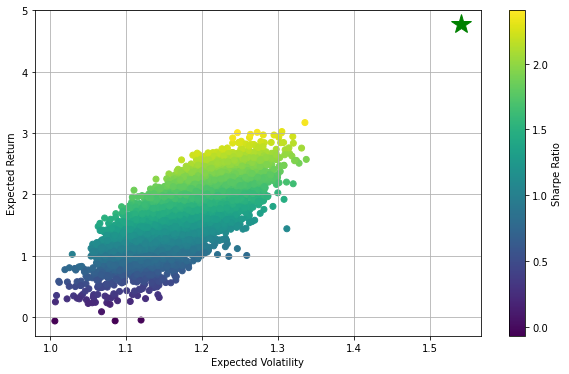

In [69]:
pweights, pmeans, prisks = generate_portfolios(vol_df,portfolio_weights)
popt = optimize_portfolio(pweights, vol_df,11)
show_optimal_portfolio(popt, vol_df,pmeans, prisks)

Monte Carlo 100k Rounds Markowitz Portfolio Optimization Alts W/O Eth


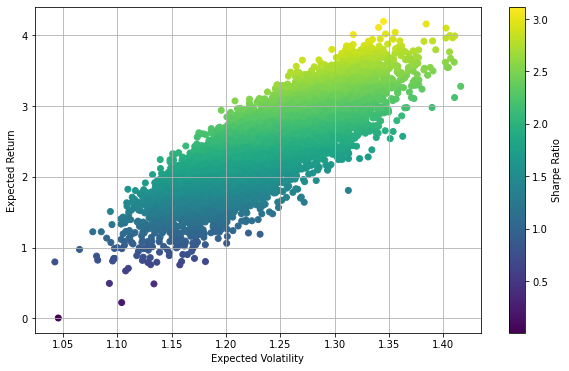

In [73]:
pweights, pmeans, prisks = generate_portfolios(non_eth_vol_df,portfolio_non_eth_weights)
print("Monte Carlo 100k Rounds Markowitz Portfolio Optimization Alts W/O Eth")
show_portfolios(pmeans, prisks)

## Portfolio of 6 Selected Coins

In [100]:
protfolio_six_coins=['eth','sol','matic','ftm','luna','avax']
portfolio_six_weights=[.40,.20,.15,.15,.10]
protfolio_six_coins_close_df = pd.DataFrame(columns=protfolio_six_coins)

protfolio_six_coins_close_df['eth'] = eth_df.iloc[::-1]['Close']
protfolio_six_coins_close_df['sol'] = sol_df.iloc[::-1]['Close']
protfolio_six_coins_close_df['matic'] = matic_df.iloc[::-1]['Close']
protfolio_six_coins_close_df['ftm'] = ftm_df.iloc[::-1]['Close']
protfolio_six_coins_close_df['luna'] = luna_terra_df.iloc[::-1]['Close']
protfolio_six_coins_close_df['avax'] = avax_df.iloc[::-1]['Close']
protfolio_six_coins_close_df.index = pd.to_datetime(protfolio_six_coins_close_df.index)


P6_GLOBAL_NUMBER_OF_TRADING_DAYS = (datetime(2022,1,17) - datetime(2020,12,1)).days
protfolio_six_coins_close_df = protfolio_six_coins_close_df[protfolio_six_coins_close_df.index > datetime(2020,12,1)]

protfolio_six_coins_close_df, P6_GLOBAL_NUMBER_OF_TRADING_DAYS

(                    eth         sol     matic       ftm       luna       avax
 Date                                                                         
 2020-12-02   598.357253    2.112355  0.019348  0.022646   0.406560   3.745825
 2020-12-03   616.904853    2.098405  0.020795  0.022888   0.500521   3.819472
 2020-12-04   571.978333    1.856668  0.018869  0.021042   0.452620   3.556966
 2020-12-05   595.548506    1.977440  0.019663  0.022497   0.507713   3.630332
 2020-12-06   601.697268    1.852639  0.019550  0.021960   0.501092   3.604745
 ...                 ...         ...       ...       ...        ...        ...
 2022-01-12  3374.303800  151.644100  2.387033  2.932180  82.391900  95.857500
 2022-01-13  3256.141500  146.143700  2.267512  3.004518  78.292500  89.676900
 2022-01-14  3314.714162  146.287610  2.339803  2.957646  81.729617  90.260713
 2022-01-15  3331.834267  147.772275  2.353586  3.012270  87.606706  93.324915
 2022-01-16  3354.693115  147.892321  2.330809  3.30

In [96]:
protfolio_six_coins_close_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1143 entries, 2018-12-01 to 2022-01-16
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   eth     1143 non-null   float64
 1   sol     412 non-null    float64
 2   matic   778 non-null    float64
 3   ftm     1143 non-null   float64
 4   luna    412 non-null    float64
 5   avax    412 non-null    float64
dtypes: float64(6)
memory usage: 62.5 KB


Text(0.5, 1.0, 'P6 - Price Over Time')

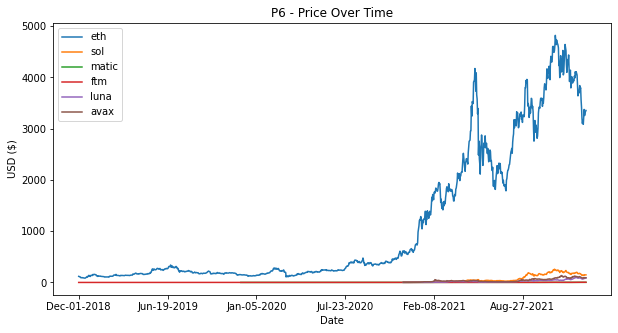

In [77]:
ax = protfolio_six_coins_close_df.plot(figsize=(10,5))
#ax.set_xlim(pd.Timestamp('2020-12-15'),pd.Timestamp('2022-01-20'))
ax.set_ylabel("USD ($)")
ax.set_xlabel("Date")
ax.set_title('P6 - Price Over Time')

In [101]:

protfolio_six_coins_vol_df = pd.DataFrame(columns=protfolio_six_coins)
protfolio_six_coins_vol_df = np.log(protfolio_six_coins_close_df/protfolio_six_coins_close_df.shift(1))

Text(0.5, 1.0, 'Log Normailzed Return Over Time P6')

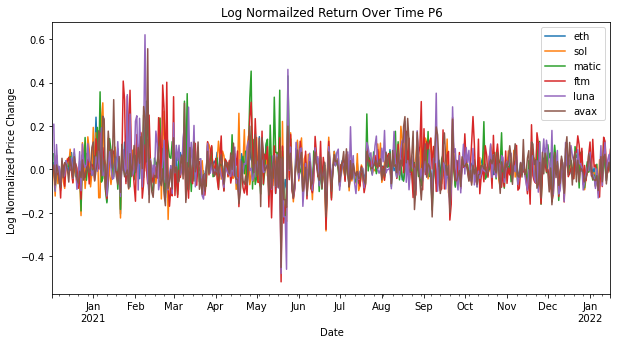

In [102]:
ax = protfolio_six_coins_vol_df.plot(figsize=(10,5))
#ax.set_xlim(pd.Timestamp('2021-01-15'),pd.Timestamp('2022-01-20'))
ax.set_ylabel("Log Normalized Price Change ")
ax.set_xlabel("Date")
ax.set_title('Log Normailzed Return Over Time P6')

In [105]:
# Annualized Return
print(protfolio_six_coins_vol_df.mean() * P6_GLOBAL_NUMBER_OF_TRADING_DAYS)
# Covariance
print(protfolio_six_coins_vol_df.cov() * P6_GLOBAL_NUMBER_OF_TRADING_DAYS)

eth      1.732337
sol      4.269406
matic    4.814756
ftm      5.007868
luna     5.392814
avax     3.219799
dtype: float64
            eth       sol     matic       ftm      luna      avax
eth    1.201543  0.972034  1.233307  1.321909  1.096815  1.025297
sol    0.972034  2.812645  1.336822  1.835395  1.646034  1.336204
matic  1.233307  1.336822  3.586034  2.123478  1.541995  1.721082
ftm    1.321909  1.835395  2.123478  4.635655  1.816776  1.634890
luna   1.096815  1.646034  1.541995  1.816776  3.889725  1.662543
avax   1.025297  1.336204  1.721082  1.634890  1.662543  3.246710
